# Do I Have Kidney Stones?

## Kidney Stone Prediction based on Urine Analysis

https://www.kaggle.com/datasets/vuppalaadithyasairam/kidney-stone-prediction-based-on-urine-analysis?select=kindey+stone+urine+analysis.csv

supervised machine learning in python: predicting kidney stones with kaggle data


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


df = pd.read_csv('kindey stone urine analysis.csv')
df.sample(5)

,gravity,ph,osmo,cond,urea,calc,target
60,1.025,5.71,854,27.0,385,7.18,1
17,1.025,6.81,947,32.6,395,2.03,0
62,1.034,5.24,1236,27.3,620,12.68,1
10,1.011,6.19,345,11.5,152,1.93,0
40,1.021,5.33,815,26.0,385,2.66,0


In [24]:
train_df, val_df = train_test_split(df, test_size = 0.15, random_state=1000)

In [25]:
train_df

,gravity,ph,osmo,cond,urea,calc,target
78,1.015,6.03,416,12.8,178,9.39,1
6,1.012,5.62,461,17.4,195,1.40,0
9,1.021,6.13,779,25.7,382,2.21,0
57,1.020,7.94,567,19.7,212,6.81,1
56,1.031,5.73,874,17.4,516,3.01,1
...,...,...,...,...,...,...,...
61,1.026,6.19,956,27.6,473,5.67,1
1,1.017,5.74,577,20.0,296,4.49,0
64,1.015,5.98,487,14.8,198,3.16,1
71,1.027,5.40,840,24.5,395,7.64,1


In [27]:
val_df.shape

(12, 7)

In [31]:
X = train_df.drop(columns = 'target')
y = train_df.target

In [36]:
train_df.head()

,gravity,ph,osmo,cond,urea,calc,target
78,1.015,6.03,416,12.8,178,9.39,1
6,1.012,5.62,461,17.4,195,1.40,0
9,1.021,6.13,779,25.7,382,2.21,0
57,1.020,7.94,567,19.7,212,6.81,1
56,1.031,5.73,874,17.4,516,3.01,1


In [35]:
X.columns.tolist()

['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

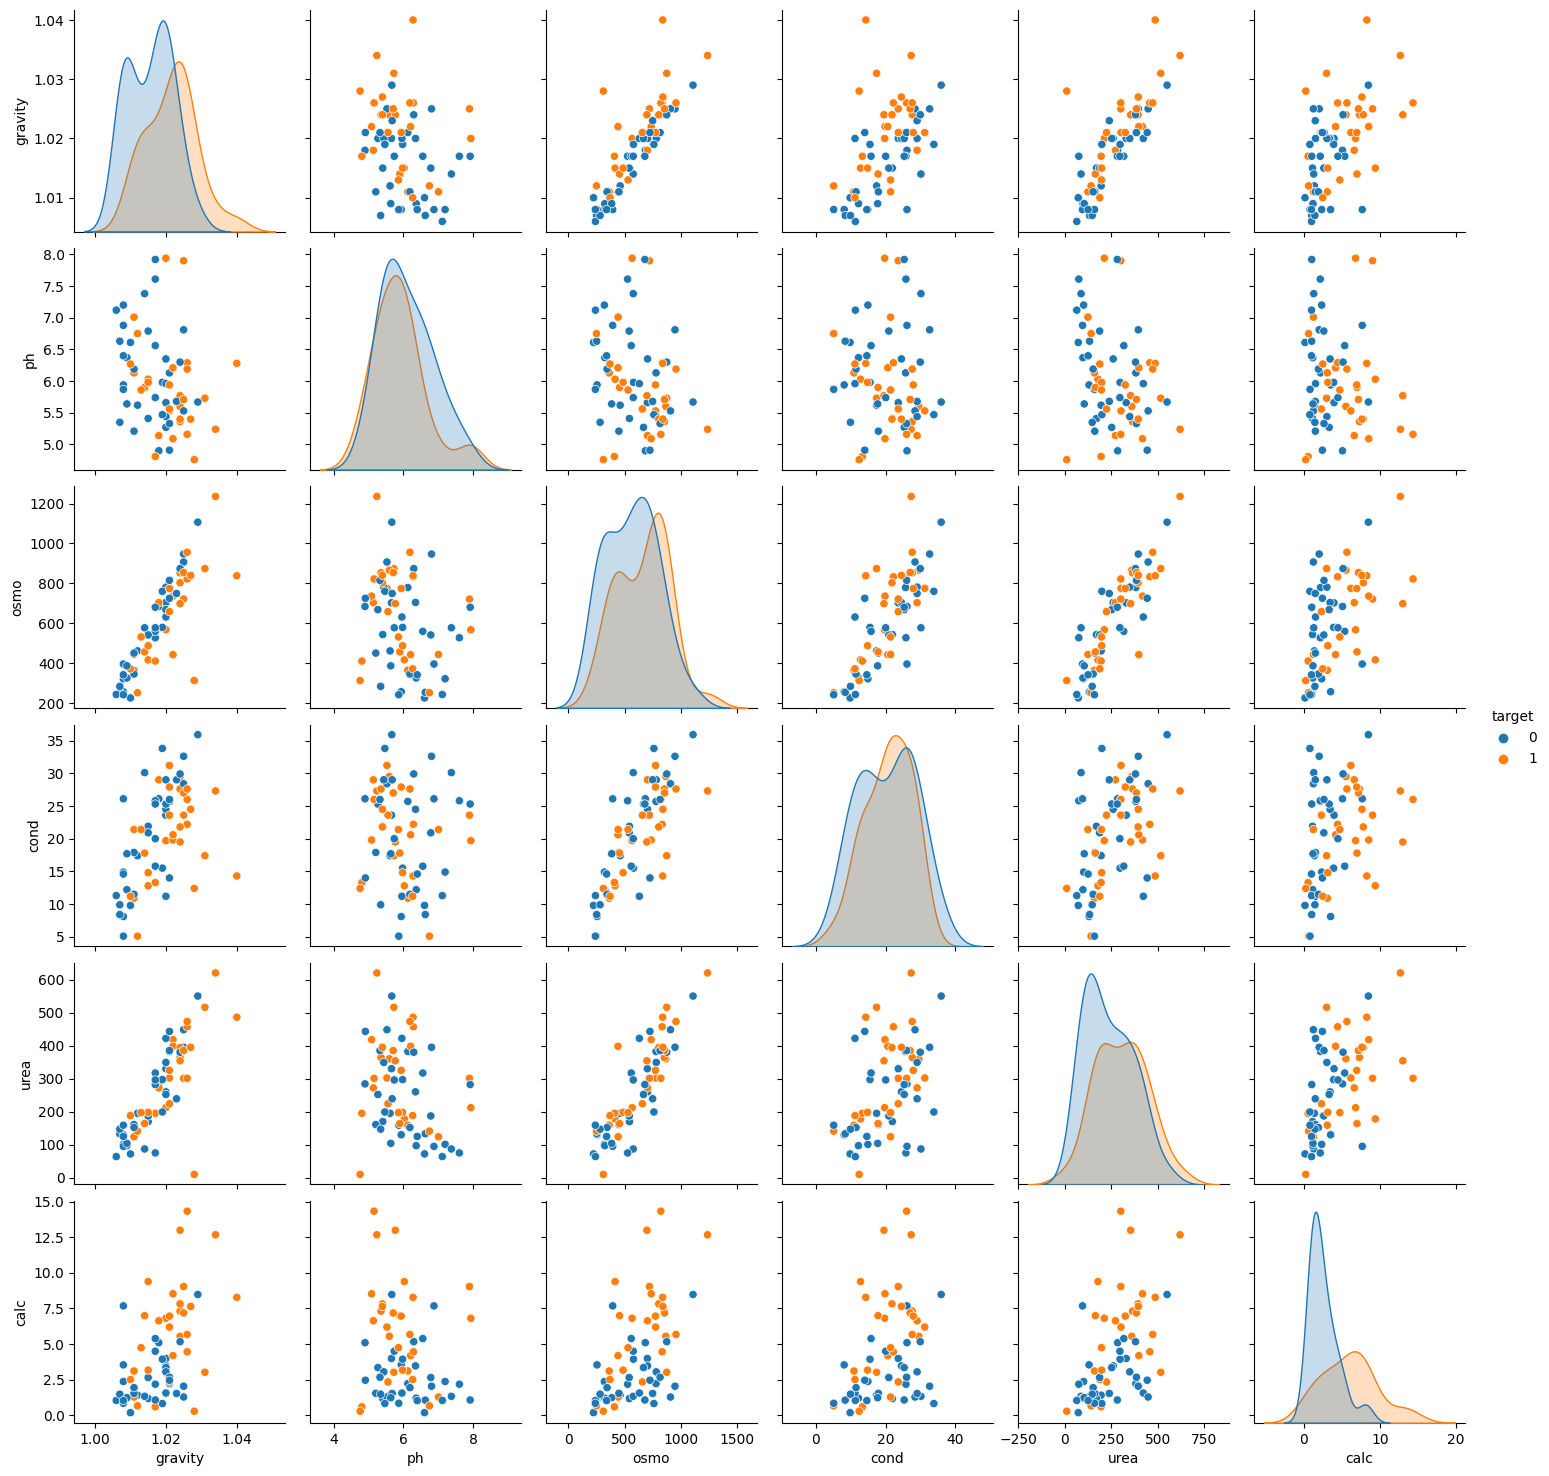

In [38]:
sns.pairplot(train_df, vars=['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], hue ='target')
         

In [39]:
train_df.skew()

gravity    0.302179
ph         0.789422
osmo       0.158071
cond      -0.160960
urea       0.345186
calc       1.130153
target     0.214948
dtype: float64

In [40]:
train_df.mean()

gravity      1.018299
ph           6.011493
osmo       609.402985
cond        20.543284
urea       266.791045
calc         4.117164
target       0.447761
dtype: float64

In [41]:
clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(C = 1.0)
)

clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [43]:
scores = cross_val_score(clf, X = X, y = y, cv = 5)
scores.mean()

0.7472527472527473

In [45]:
cs = np.logspace(-3,3, 7)

for c in cs:
    clf = make_pipeline(
        StandardScaler(),
        LogisticRegression(C = c)
    )
    scores = cross_val_score(clf, X = X, y = y, cv = 5)
    print(f'{c} - {scores.mean().round(2)}')


0.001 - 0.55
0.01 - 0.7
0.1 - 0.8
1.0 - 0.75
10.0 - 0.73
100.0 - 0.76
1000.0 - 0.78


In [47]:
clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(C = 0.1)
)
    
clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.1))])

In [48]:
X_val = val_df.drop(columns = 'target')
y_val = val_df.target
clf.predict(X_val)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [49]:
clf.score(X_val, y_val)

0.8333333333333334

In [50]:
clf.predict_proba(X)

array([[0.2898653 , 0.7101347 ],
       [0.72262044, 0.27737956],
       [0.64865636, 0.35134364],
       [0.43841442, 0.56158558],
       [0.39100266, 0.60899734],
       [0.74798646, 0.25201354],
       [0.62189899, 0.37810101],
       [0.7215201 , 0.2784799 ],
       [0.09937365, 0.90062635],
       [0.46323789, 0.53676211],
       [0.54944169, 0.45055831],
       [0.81154606, 0.18845394],
       [0.48469845, 0.51530155],
       [0.67294064, 0.32705936],
       [0.60013822, 0.39986178],
       [0.74686008, 0.25313992],
       [0.52378579, 0.47621421],
       [0.76033954, 0.23966046],
       [0.35860336, 0.64139664],
       [0.47835311, 0.52164689],
       [0.64245122, 0.35754878],
       [0.62816743, 0.37183257],
       [0.29968387, 0.70031613],
       [0.50819188, 0.49180812],
       [0.27069452, 0.72930548],
       [0.48848229, 0.51151771],
       [0.57666832, 0.42333168],
       [0.75567415, 0.24432585],
       [0.31331771, 0.68668229],
       [0.48113827, 0.51886173],
       [0.

<AxesSubplot: >

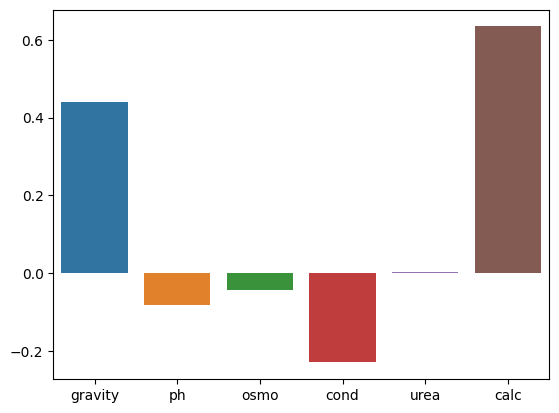

In [51]:
sns.barplot(y = clf['logisticregression'].coef_.flatten(), x = X.columns)